# Clustering
-  Group the data based on similarities 
-  How many group, How grouping is done

In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [3]:
#data
mt = data('mtcars')
print(mt.shape, mt.columns,'\n')
#print(mt.dtypes, '\n', mt[['am','mpg','wt','hp','gear']].head())

(32, 11) Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object') 



In [4]:
data1 = mt[['am','mpg','wt','hp','gear']].copy()
data1.head()

,am,mpg,wt,hp,gear
Mazda RX4,1,21.0,2.620,110,4
Mazda RX4 Wag,1,21.0,2.875,110,4
Datsun 710,1,22.8,2.320,93,4
Hornet 4 Drive,0,21.4,3.215,110,3
Hornet Sportabout,0,18.7,3.440,175,3


#install libraries if required
!pip install kneed

In [8]:
#group these cars
from sklearn.cluster import KMeans
#!pip install kneed
from kneed import KneeLocator
#from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1).round(2)
scaled_data[1:5]

array([[ 1.21,  0.15, -0.36, -0.54,  0.43],
       [ 1.21,  0.46, -0.93, -0.8 ,  0.43],
       [-0.83,  0.22, -0.  , -0.54, -0.95],
       [-0.83, -0.23,  0.23,  0.42, -0.95]])

In [10]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=123)

In [11]:
kmeans.fit(scaled_data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3, n_init=10, random_state=123)

In [12]:
print('Lowest SSE ', kmeans.inertia_)

Lowest SSE  57.90185300751878


In [13]:
print('Final locations of the centroid' )
kmeans.cluster_centers_   #these scaled values of   mt[['am','mpg','wt','hp','gear']]

Final locations of the centroid


array([[ 1.21      ,  1.51      , -1.33      , -1.02      ,  0.82428571],
       [ 1.21      , -0.18833333, -0.26166667,  0.55166667,  1.12      ],
       [-0.83      , -0.49473684,  0.57263158,  0.20052632, -0.65947368]])

In [15]:
kmeans.predict(scaled_data)

array([1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 1, 1, 1, 1])

In [16]:
type(kmeans.predict(scaled_data))

numpy.ndarray

In [22]:
data1['cluster'] = kmeans.predict(scaled_data)
data1.head(32)

,am,mpg,wt,hp,gear,cluster
Mazda RX4,1,21.0,2.620,110,4,1
Mazda RX4 Wag,1,21.0,2.875,110,4,1
Datsun 710,1,22.8,2.320,93,4,0
Hornet 4 Drive,0,21.4,3.215,110,3,2
Hornet Sportabout,0,18.7,3.440,175,3,2
Valiant,0,18.1,3.460,105,3,2
Duster 360,0,14.3,3.570,245,3,2
Merc 240D,0,24.4,3.190,62,4,2
Merc 230,0,22.8,3.150,95,4,2
Merc 280,0,19.2,3.440,123,4,2


In [26]:
data1.groupby('cluster', observed=True).agg({'am':['mean', 'std'], 'mpg':['mean', 'std'], 'hp':['mean', 'std'], 'wt':['mean', 'std']})

am             mpg                    hp                   wt  \
        mean  std       mean       std        mean        std      mean   
cluster                                                                   
0        1.0  0.0  29.028571  3.868985   78.000000  21.416505  1.936857   
1        1.0  0.0  18.983333  2.845640  183.833333  95.769341  2.964167   
2        0.0  0.0  17.147368  3.833966  160.263158  53.908196  3.768895   

                   
              std  
cluster            
0        0.303022  
1        0.348546  
2        0.777400

In [27]:
mt[['mpg','wt','hp']].agg('std')

mpg     6.026948
wt      0.978457
hp     68.562868
dtype: float64

In [31]:
#how to select number of clusters
from yellowbrick.cluster.elbow import kelbow_visualizer
#!pip install yellowbrick
#https://www.scikit-yb.org/en/latest/api/cluster/elbow.html#quick-method

In [32]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

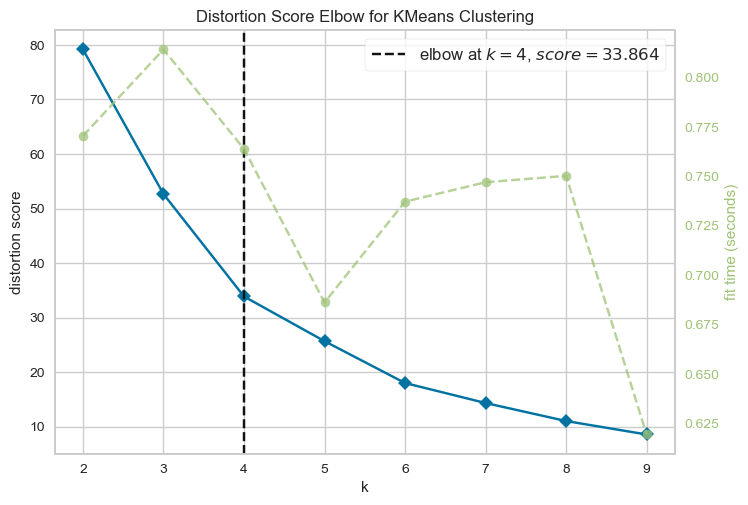

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=(2, 10))

In [33]:
# k is range of number of clusters.
#error due to memory leans 
kelbow_visualizer(KMeans(random_state=4), scaled_data, k=(2,10), n_init=4, P_NUM_THREADS=1)
#https://stackoverflow.com/questions/69596239/how-to-avoid-memory-leak-when-dealing-with-kmeans-for-example-in-this-code-i-am

In [34]:
kmeans4 = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=123)

In [35]:
kmeans4.fit(scaled_data)
print('Lowest SSE ', kmeans4.inertia_)
#earlier it was 57

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Lowest SSE  33.864395476190474


In [36]:
#anoterh way
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_data)
    Sum_of_squared_distances.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

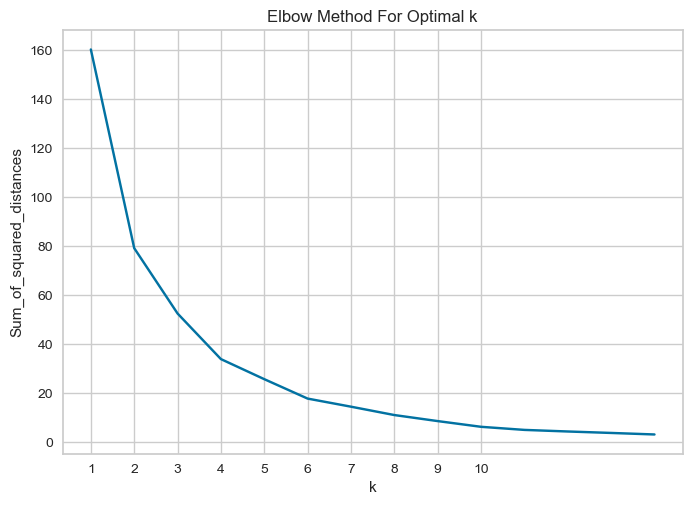

In [38]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xticks(range(1,11))
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show();
#here also it is showing 4 clusters

In [ ]:
# Practise
#https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f


In [40]:
scaled_data

array([[ 1.21,  0.15, -0.62, -0.54,  0.43],
       [ 1.21,  0.15, -0.36, -0.54,  0.43],
       [ 1.21,  0.46, -0.93, -0.8 ,  0.43],
       [-0.83,  0.22, -0.  , -0.54, -0.95],
       [-0.83, -0.23,  0.23,  0.42, -0.95],
       [-0.83, -0.34,  0.25, -0.62, -0.95],
       [-0.83, -0.98,  0.37,  1.46, -0.95],
       [-0.83,  0.73, -0.03, -1.25,  0.43],
       [-0.83,  0.46, -0.07, -0.77,  0.43],
       [-0.83, -0.15,  0.23, -0.35,  0.43],
       [-0.83, -0.39,  0.23, -0.35,  0.43],
       [-0.83, -0.62,  0.89,  0.49, -0.95],
       [-0.83, -0.47,  0.53,  0.49, -0.95],
       [-0.83, -0.82,  0.58,  0.49, -0.95],
       [-0.83, -1.63,  2.11,  0.86, -0.95],
       [-0.83, -1.63,  2.29,  1.01, -0.95],
       [-0.83, -0.91,  2.21,  1.23, -0.95],
       [ 1.21,  2.08, -1.06, -1.2 ,  0.43],
       [ 1.21,  1.74, -1.66, -1.4 ,  0.43],
       [ 1.21,  2.33, -1.44, -1.21,  0.43],
       [-0.83,  0.24, -0.78, -0.74, -0.95],
       [-0.83, -0.77,  0.31,  0.05, -0.95],
       [-0.83, -0.82,  0.23,  0.

In [43]:
kmeans = KMeans(n_clusters=3).fit(scaled_data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
kmeans.inertia_

52.48252424242425

In [45]:
kmeans.labels_

array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 2, 0, 0, 0, 2])

In [47]:
kmeans.cluster_centers_

array([[ 1.21      , -0.55      , -0.04666667,  1.65      ,  1.81      ],
       [-0.83      , -0.56277778,  0.60611111,  0.28111111, -0.72      ],
       [ 1.02454545,  1.07454545, -0.97909091, -0.91181818,  0.68090909]])

In [51]:
data1['cluster'] = kmeans.predict(scaled_data)
data1.head(32)

,am,mpg,wt,hp,gear,cluster
Mazda RX4,1,21.0,2.620,110,4,2
Mazda RX4 Wag,1,21.0,2.875,110,4,2
Datsun 710,1,22.8,2.320,93,4,2
Hornet 4 Drive,0,21.4,3.215,110,3,1
Hornet Sportabout,0,18.7,3.440,175,3,1
Valiant,0,18.1,3.460,105,3,1
Duster 360,0,14.3,3.570,245,3,1
Merc 240D,0,24.4,3.190,62,4,2
Merc 230,0,22.8,3.150,95,4,1
Merc 280,0,19.2,3.440,123,4,1


In [52]:
data1.groupby('cluster').agg({'mpg':'mean'})

,mpg
cluster,
0,16.833333
1,16.744444
2,26.454545


## end here